In [1]:
import os
import math
import theano
import seaborn
import itertools 
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation
from keras.regularizers import l2, activity_l2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from matplotlib import cm
%matplotlib inline

Using gpu device 0: GeForce GT 750M (CNMeM is disabled, cuDNN 5004)
/Users/franciscojavierarceo/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


# Generating synthetic data from a step function in two variables

In [3]:
x1 = np.arange(-100,100)
x2 = np.arange(-100,100)
xs = np.asarray(list(itertools.product(x1,x2)))
ys = np.zeros( (len(xs),))

# This defines our function (i.e., f(x) = y)
clist = [-75, -50, -25, 25, 50, 75]
olist = [10, 25, 50, 75, 100]
for c, o in zip(clist, olist):
    flt = (xs[:,0]> c) & (xs[:,1] > c)
    ys[np.where(flt),] = o

# Plotting the true step function

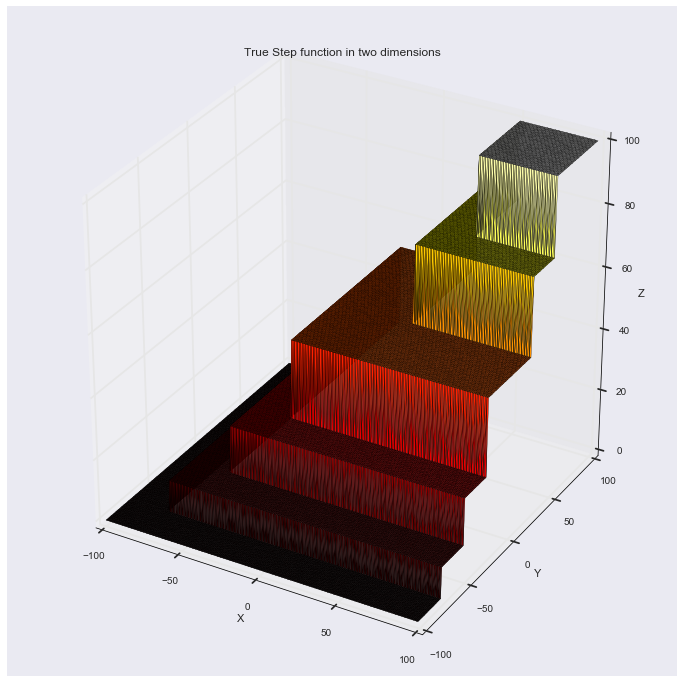

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(xs[:,0], xs[:,1], ys, cmap=cm.hot)
ax.set_title('True Step function in two dimensions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Learning a GBM

In [7]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.5, random_state=420)

estimator = ExtraTreesRegressor(n_estimators=1000, max_features=1,random_state=0)
estimator.fit(X_train, y_train)
yprd_tst = estimator.predict(X_test)
err = yprd_tst - y_test

# Learning the NN

In [9]:
nhidden = 10
n_neurons = 200
model = Sequential()

# Initial layer
model.add(Dense(n_neurons, input_dim=2,activation='relu'))

# Creating nhidden number of layers 
for i in range(nhidden):
    model.add(Dense(n_neurons, activation='relu', W_regularizer=l2(0.01),
                    activity_regularizer=activity_l2(0.01)))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train,
          nb_epoch=200, batch_size=50,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

yprd_tstnn = model.predict(X_test)[:,0]
errnn = yprd_tstnn - y_test

Train on 20000 samples, validate on 20000 samples
Epoch 1/200
20000/20000 [==============================] - 8s - loss: 147.2136 - val_loss: 31.1218
Epoch 2/200
20000/20000 [==============================] - 7s - loss: 52.8151 - val_loss: 27.2077
Epoch 3/200
20000/20000 [==============================] - 7s - loss: 43.5450 - val_loss: 29.5793
Epoch 4/200
20000/20000 [==============================] - 7s - loss: 39.7891 - val_loss: 21.2956
Epoch 5/200
20000/20000 [==============================] - 7s - loss: 36.9894 - val_loss: 17.4340
Epoch 6/200
20000/20000 [==============================] - 7s - loss: 34.1125 - val_loss: 28.7720
Epoch 7/200
20000/20000 [==============================] - 7s - loss: 34.0753 - val_loss: 13.6675
Epoch 8/200
20000/20000 [==============================] - 7s - loss: 31.8191 - val_loss: 14.6854
Epoch 9/200
20000/20000 [==============================] - 7s - loss: 30.1788 - val_loss: 23.2333
Epoch 10/200
20000/20000 [==============================] - 7s - lo

# Plotting the learned function and the residuals in 3d

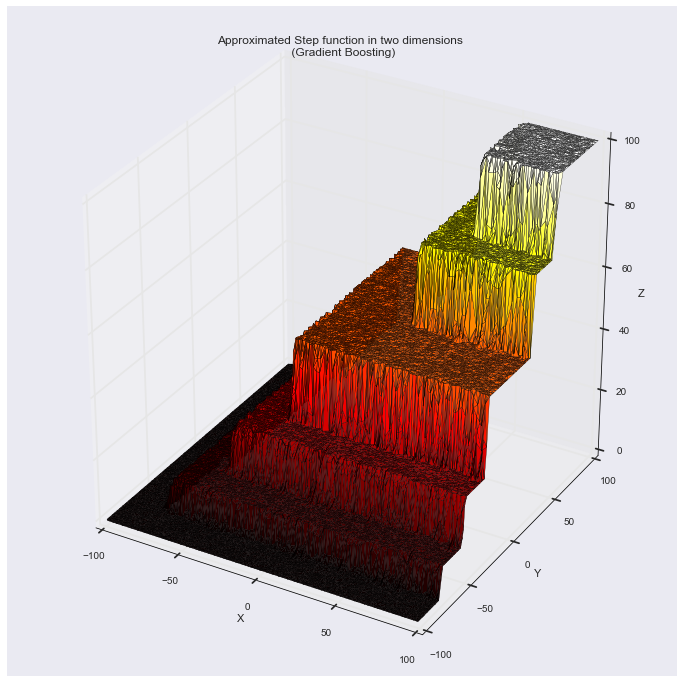

In [10]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], yprd_tst, cmap=cm.hot)
ax.set_title('Approximated Step function in two dimensions \n (Gradient Boosting)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [15]:
print("The RMSE of the GBM is %0.3f" % np.sqrt( ((yprd_tst - y_test)**2).sum()))
print("The RMSE of the NN is %0.3f" % np.sqrt( ((yprd_tstnn - y_test)**2).sum()))

The RMSE of the GBM is 208.879
The RMSE of the NN is 548.118


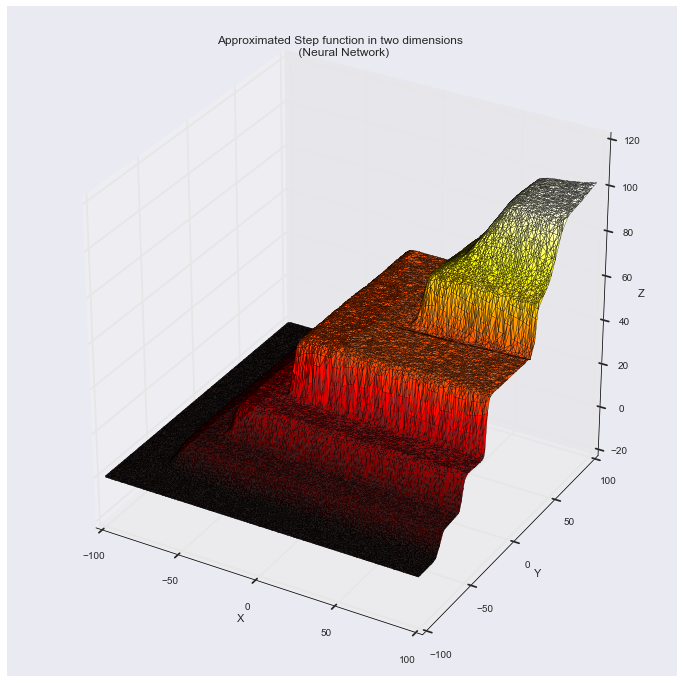

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], yprd_tstnn, cmap=cm.hot)
ax.set_title('Approximated Step function in two dimensions \n (Neural Network)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

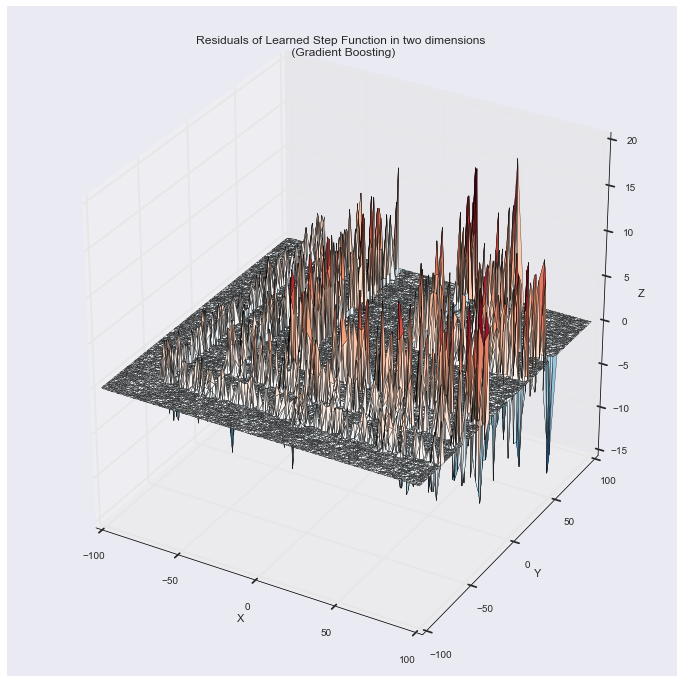

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], err, cmap=cm.RdBu_r)
ax.set_title('Residuals of Learned Step Function in two dimensions \n (Gradient Boosting)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

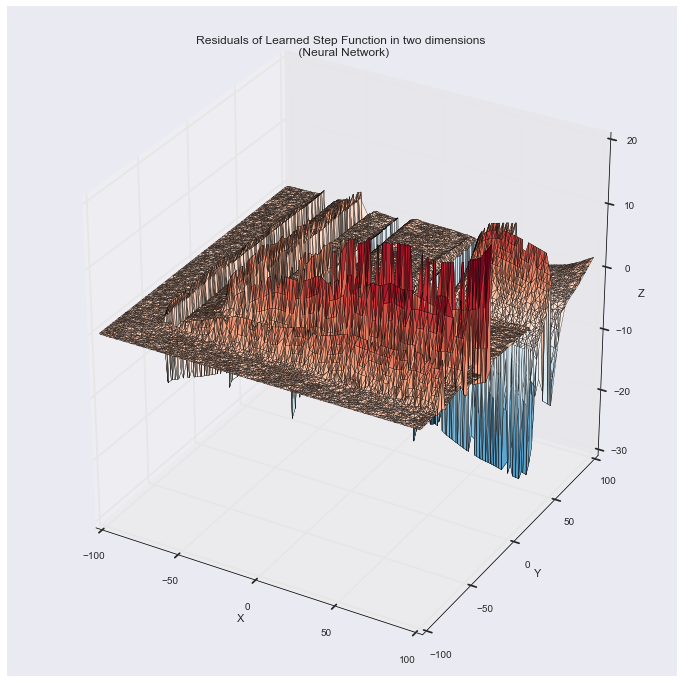

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], errnn, cmap=cm.RdBu_r)
ax.set_title('Residuals of Learned Step Function in two dimensions \n (Neural Network)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()